In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


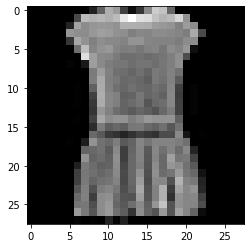

In [5]:
plt.imshow(x_train[3], cmap = 'gray')

In [6]:
print("Shape of the train dataset ", x_train.shape)
print("Shape of the test dataset ", x_test.shape)

Shape of the train dataset  (60000, 28, 28)
Shape of the test dataset  (10000, 28, 28)


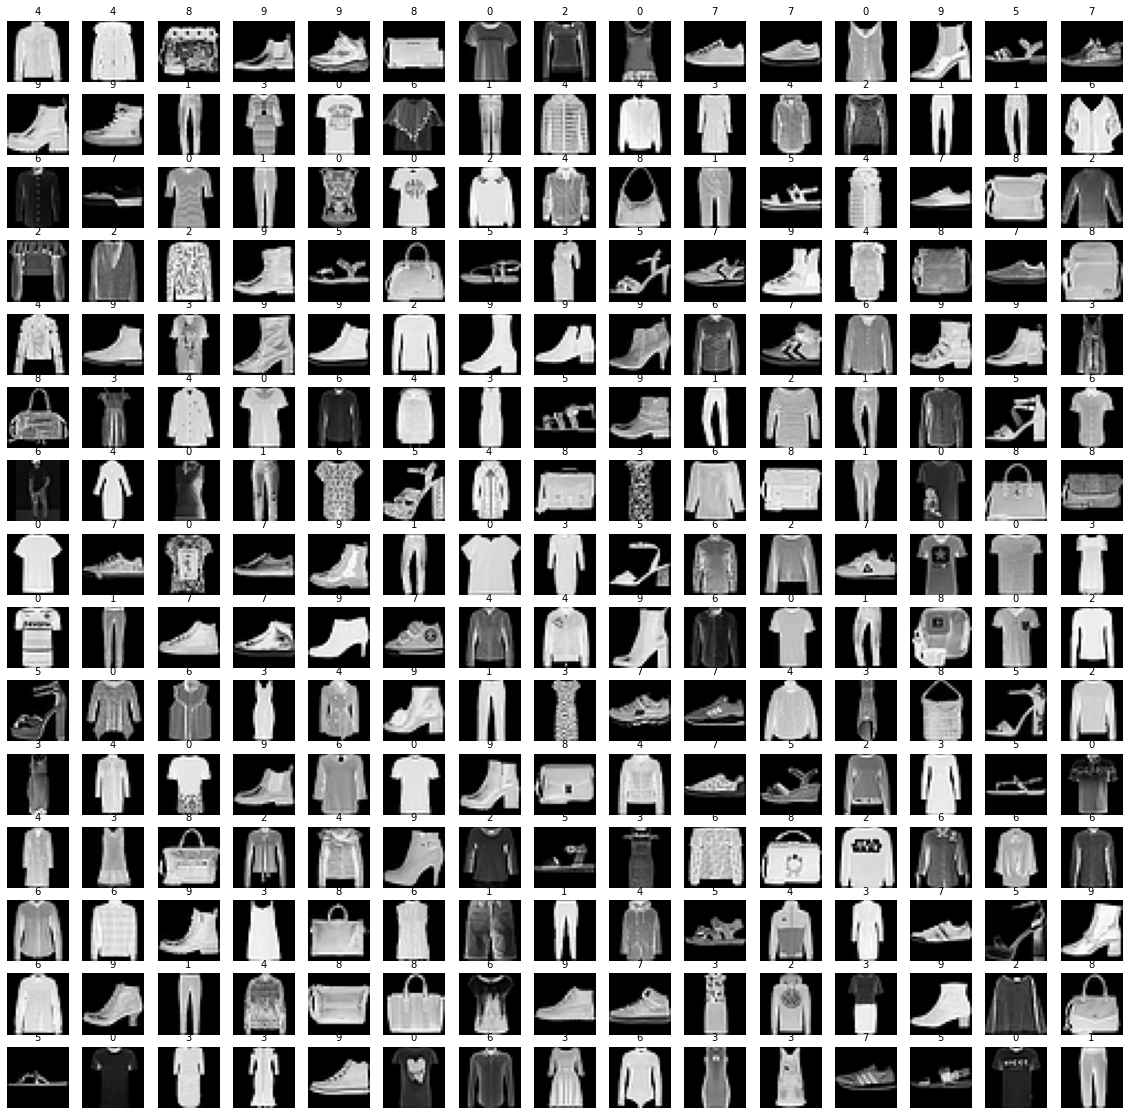

In [8]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid,w_grid, figsize=(20,20))

axes = axes.ravel() #flattening the 15*15 matrix to 225 matrix

n_training = len(x_train)

for i in range(l_grid * w_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index], cmap='gray')
  axes[i].set_title(y_train[index], fontsize = 10)
  axes[i].axis('off')

In [0]:
x_train = x_train/255
x_test = x_test/255

noise_factor = 0.3

noise_dataset = []

for img in x_train:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

In [0]:
noise_dataset = np.array(noise_dataset)

In [0]:
noise_factor = 0.2

noise_test_dataset = []

for img in x_test:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)

In [0]:
noise_test_dataset = np.array(noise_test_dataset)

In [0]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

#Decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2,activation='sigmoid', padding='same'))

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                x_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size = 200,
                validation_data=(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1)),
                )

Epoch 1/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3957 - val_loss: 0.3184
Epoch 2/10
300/300 [==============================] - 15s 48ms/step - loss: 0.3162 - val_loss: 0.3084
Epoch 3/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3099 - val_loss: 0.3024
Epoch 4/10
300/300 [==============================] - 15s 48ms/step - loss: 0.3061 - val_loss: 0.2992
Epoch 5/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3044 - val_loss: 0.2976
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3034 - val_loss: 0.2965
Epoch 7/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3026 - val_loss: 0.2956
Epoch 8/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3020 - val_loss: 0.2948
Epoch 9/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3013 - val_loss: 0.2949
Epoch 10/10
300/300 [==============================] - 14s 48ms/step - loss: 0.300

In [22]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)



x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img, decoded)
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


In [23]:
autoencoder2.fit(noise_dataset.reshape(-1,28,28,1),
                x_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size = 200,
                validation_data=(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1)),
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.4011 - val_loss: 0.3419
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3393 - val_loss: 0.3274
Epoch 3/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3273 - val_loss: 0.3204
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3213 - val_loss: 0.3182
Epoch 5/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3175 - val_loss: 0.3139
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3149 - val_loss: 0.3155
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3127 - val_loss: 0.3095
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.3111 - val_loss: 0.3109
Epoch 9/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3089 - val_loss: 0.3077
Epoch

In [0]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

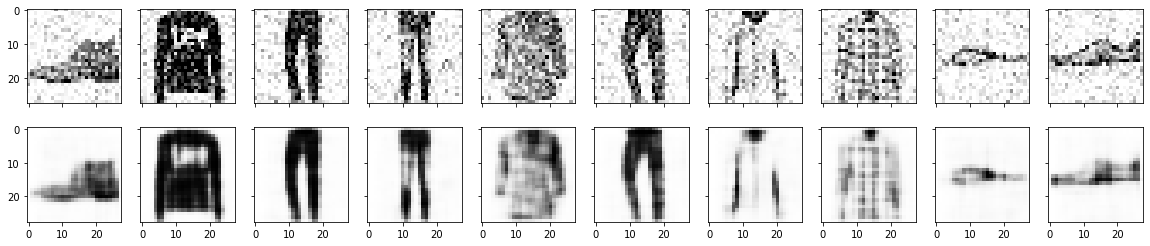

In [30]:
fig ,axes = plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(20,4))
for images, row in zip([noise_test_dataset[:10],predicted],axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape((28,28)),cmap='Greys')


In [0]:
predicted2 = autoencoder2.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

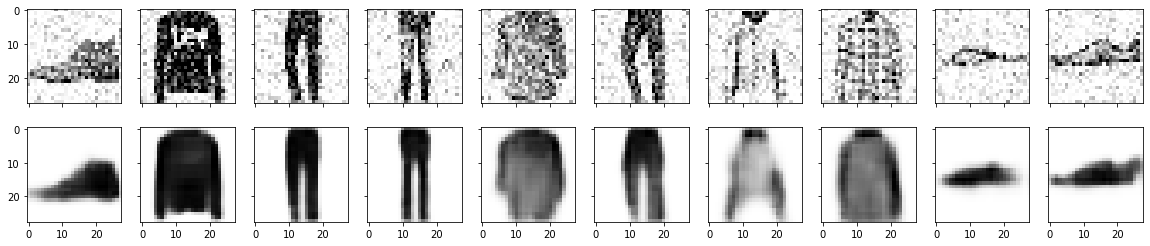

In [33]:
fig ,axes = plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(20,4))
for images, row in zip([noise_test_dataset[:10],predicted2],axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape((28,28)),cmap='Greys')
